In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
%reload_ext autoreload

import os
import pandas as pd
import torch
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import repackage
repackage.up()

from modelo_perceptron import *
from utils import *
from fluxdataset import *

In [2]:
PATH = "../datos/"
TRAIN_FILE = "exoTrain.csv"

In [3]:
df_train = pd.read_csv(f'{PATH}{TRAIN_FILE}', low_memory=False)
df_train['LABEL'] = df_train['LABEL'].add(-1)

In [4]:
df_train.iloc[:,1:] = df_train.iloc[:,1:].apply(z_score_normalizing, axis = 1)
df_train.iloc[:,1:] = reduce_upper_outliers(df_train.iloc[:,1:])

In [5]:
df_train_x, df_train_y = generate_x_y_df(df_train)
df_train_x = df_train_x.apply(fourier_transformation, axis = 1)
serie = pd.Series(df_train_x)
df_train = pd.DataFrame(serie.values.tolist())
df_train.insert(0, 'LABEL', df_train_y)

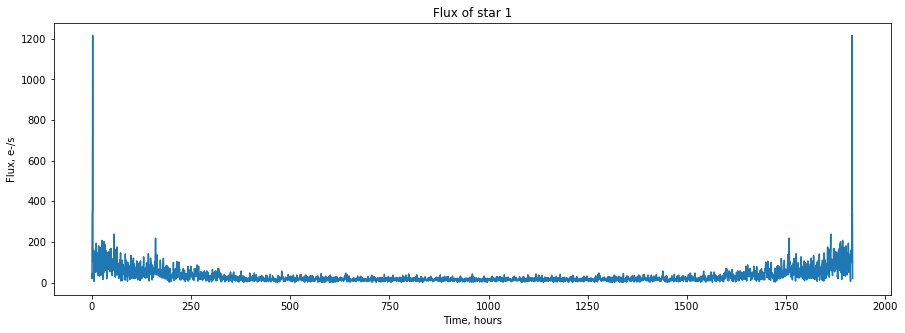

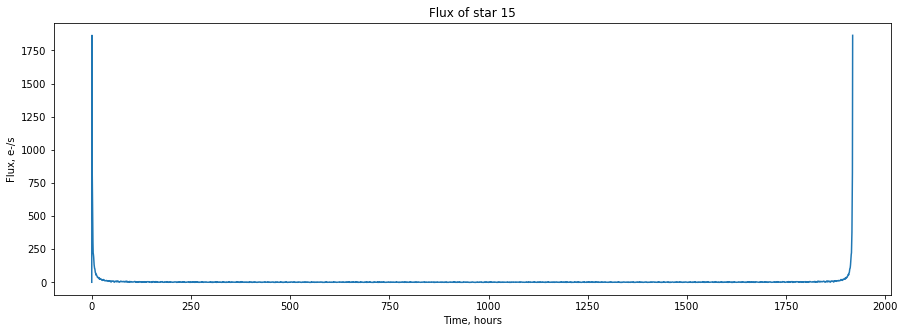

In [6]:
show_flux_plot(df_train.drop('LABEL', axis = 1), [0, 14])

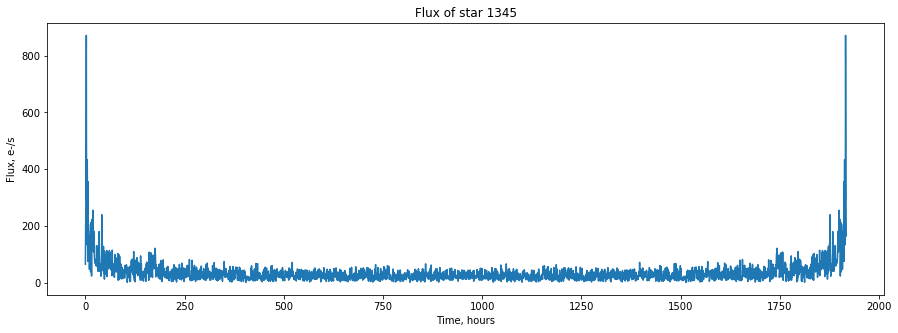

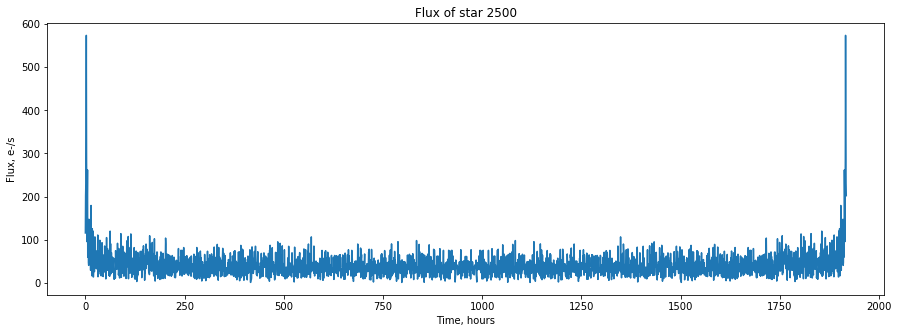

In [7]:
show_flux_plot(df_train.drop('LABEL', axis = 1), [1344, 2499])

In [8]:
# Como fft produce una represetancion de la frecuencia simetrica,
# nos quedamos solo con la primera mitad de las caracteristicas
df_fourier = df_train.iloc[:,:(df_train.shape[1]//2)]

Un par de estrellas con exoplanetas

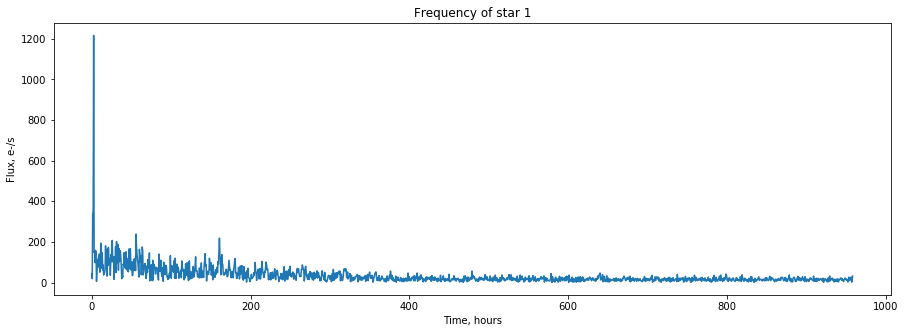

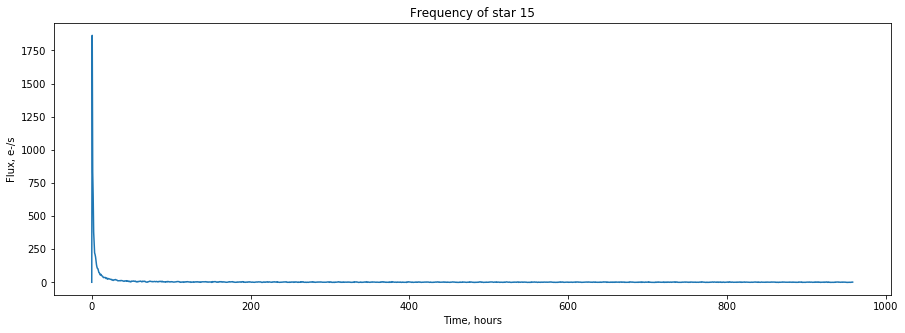

In [9]:
show_flux_plot(df_fourier.drop('LABEL', axis = 1), [0, 14], 'Frequency')

Estrellas sin exoplanetas

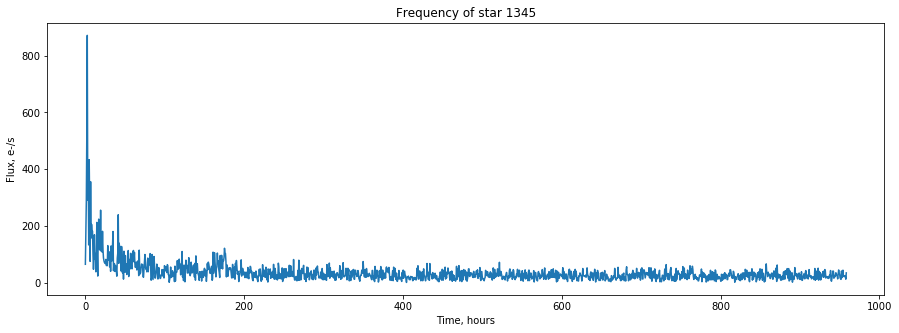

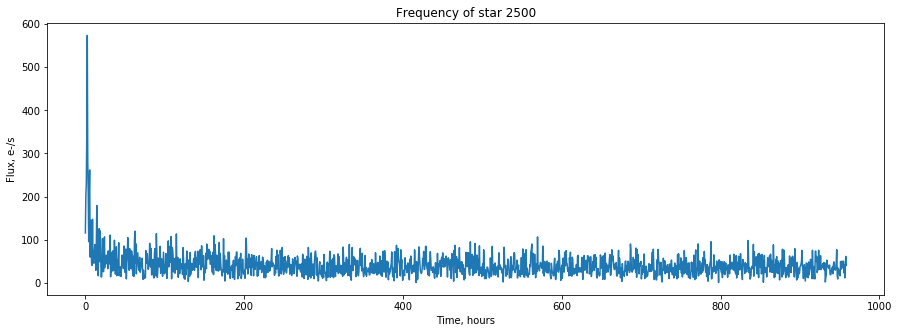

In [10]:
show_flux_plot(df_fourier.drop('LABEL', axis = 1), [1344, 2499], 'Frequency')

In [11]:
df_fourier.iloc[:,1:] = df_fourier.iloc[:,1:].apply(z_score_normalizing, axis = 1)
validation_proportion = 0.2
df_train_fourier, df_validation_fourier = split_train_df(df_fourier, validation_proportion)

In [12]:
epochs = 100
learning_rate = 0.001
alpha = 0.5
beta = 0.5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
sizes = [1598, 1000, 250, 20]
modelo = Perceptron(sizes).to(device)
model_name = os.getcwd() + "\\saved_models\\perceptron_sgd_cross_fourier"
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(modelo.parameters(), lr = learning_rate)

In [14]:
resultado = train_cross(modelo, model_name, criterion, optimizer, epochs, alpha, beta, 
                        df_train_fourier, df_validation_fourier, device)

using device cuda
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1010		0
Positivos	7		0

Acierto: 0.9931170344352722 Sensibilidad: 0.0 Especificidad: 1.0 Score: 0.4965585172176361
New model saved
Score 0.4965585172176361 at epoch 0
Epoch: 0 Train loss 0.07436572167592201 Validation loss 0.04395528882741928
Score 0.4965585172176361 at epoch 1
Epoch: 1 Train loss 0.04226808839406663 Validation loss 0.04317757859826088
Score 0.4965585172176361 at epoch 2
Epoch: 2 Train loss 0.037889756910338156 Validation loss 0.040821801871061325
Score 0.4965585172176361 at epoch 3
Epoch: 3 Train loss 0.03443167511309687 Validation loss 0.040599074214696884
Score 0.4965585172176361 at epoch 4
Epoch: 4 Train loss 0.03154213170747499 Validation loss 0.03710905462503433
Score 0.4965585172176361 at epoch 5
Epoch: 5 Train loss 0.027526572075757115 Validation loss 0.035458412021398544
Score 0.4965585172176361 at epoch 6
Epoch: 6 Train loss 0.022479584058906873 Validation loss 0.0

Score 0.7114763855934143 at epoch 62
Epoch: 62 Train loss 0.0025314166299834004 Validation loss 0.04179489612579346
Score 0.5680573582649231 at epoch 63
Epoch: 63 Train loss 0.0013968389069418943 Validation loss 0.047146521508693695
Score 0.7114763855934143 at epoch 64
Epoch: 64 Train loss 0.001804997191675172 Validation loss 0.0411127470433712
Score 0.6385723948478699 at epoch 65
Epoch: 65 Train loss 0.0010916203187197374 Validation loss 0.04256787896156311
Score 0.6396965980529785 at epoch 66
Epoch: 66 Train loss 0.0022160912760938417 Validation loss 0.041424673050642014
Score 0.7114763855934143 at epoch 67
Epoch: 67 Train loss 0.0013687350386776562 Validation loss 0.0417526550590992
Score 0.7102813720703125 at epoch 68
Epoch: 68 Train loss 0.001596098215632708 Validation loss 0.0431504100561142
Score 0.780866265296936 at epoch 69
Epoch: 69 Train loss 0.0006336440618266637 Validation loss 0.0441080667078495
Score 0.6396965980529785 at epoch 70
Epoch: 70 Train loss 0.00138088157194545

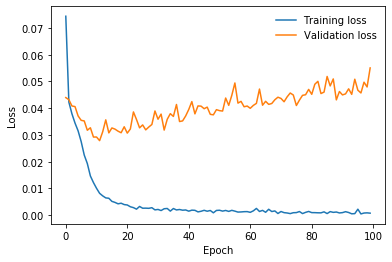

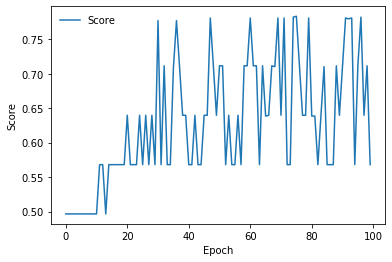

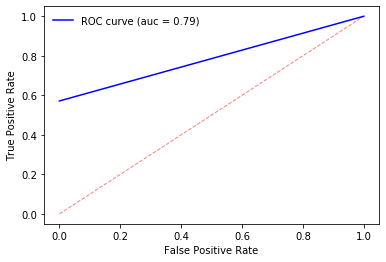

In [15]:
resultado.plot_graphics()

Fourier con SMOTE

In [16]:
df_fourier_x, df_fourier_y = generate_x_y_df(df_fourier)
sm = SMOTE()
df_smote_fourier_x, df_smote_fourier_y = sm.fit_sample(df_fourier_x, df_fourier_y)
df_smote_fourier = pd.DataFrame(df_smote_fourier_x)
df_smote_fourier.insert(0, 'LABEL', df_smote_fourier_y)
df_smote_fourier.iloc[:,1:] = df_smote_fourier.iloc[:,1:].apply(z_score_normalizing, axis = 1)
validation_proportion = 0.2
df_smote_fourier, df_smote_validation = split_train_df(df_smote_fourier, validation_proportion)

In [17]:
sizes = [1598, 1000, 250, 20]
modelo = Perceptron(sizes).to(device)
model_name = os.getcwd() + "\\saved_models\\perceptron_sgd_cross_smote_fourier"
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(modelo.parameters(), lr = learning_rate)

In [18]:
resultado = train_cross(modelo, model_name, criterion, optimizer, epochs, alpha, beta,
                                                df_smote_fourier, df_smote_validation, device)

using device cuda
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1005		5
Positivos	0		1010

Acierto: 0.9975247979164124 Sensibilidad: 1.0 Especificidad: 0.9950494766235352 Score: 0.9950556755065918
New model saved
Score 0.9950556755065918 at epoch 0
Epoch: 0 Train loss 0.14464934762973006 Validation loss 0.011213934980332851
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1008		2
Positivos	0		1010

Acierto: 0.999009907245636 Sensibilidad: 1.0 Especificidad: 0.998019814491272 Score: 0.9980207681655884
New model saved
Score 0.9980207681655884 at epoch 1
Epoch: 1 Train loss 0.011976488639074977 Validation loss 0.004989753942936659
Score 0.9970319867134094 at epoch 2
Epoch: 2 Train loss 0.008227415987760714 Validation loss 0.0043992456048727036
Score 0.9970319867134094 at epoch 3
Epoch: 3 Train loss 0.008233256106919582 Validation loss 0.003656760323792696
Score 0.9980207681655884 at epoch 4
Epoch: 4 Train loss 0.0043242698553765

Score 0.9980207681655884 at epoch 64
Epoch: 64 Train loss 0.0014707193590036713 Validation loss 0.0018554790876805782
Score 0.9980207681655884 at epoch 65
Epoch: 65 Train loss 0.00034334327619854767 Validation loss 0.002866897499188781
Score 0.9990101456642151 at epoch 66
Epoch: 66 Train loss 0.0016073123800872575 Validation loss 0.0019228325691074133
Score 0.9990101456642151 at epoch 67
Epoch: 67 Train loss 0.0002983431304150289 Validation loss 0.0017937917727977037
Score 0.9990101456642151 at epoch 68
Epoch: 68 Train loss 0.0003592747715440127 Validation loss 0.0013639237731695175
Score 0.9990101456642151 at epoch 69
Epoch: 69 Train loss 9.215606173666397e-05 Validation loss 0.0016569198342040181
Score 0.9990101456642151 at epoch 70
Epoch: 70 Train loss 8.716365635985195e-05 Validation loss 0.0013976988848298788
Score 0.9990101456642151 at epoch 71
Epoch: 71 Train loss 6.660605126088209e-05 Validation loss 0.0016623276751488447
Score 0.9990101456642151 at epoch 72
Epoch: 72 Train los

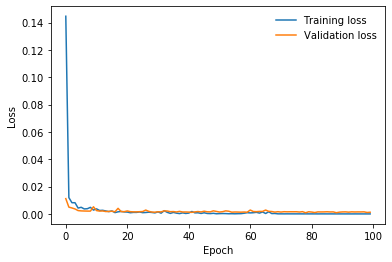

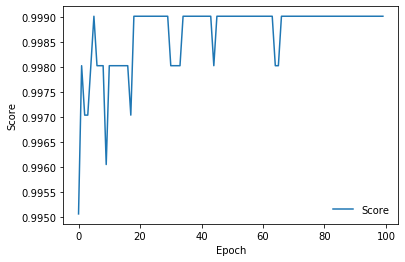

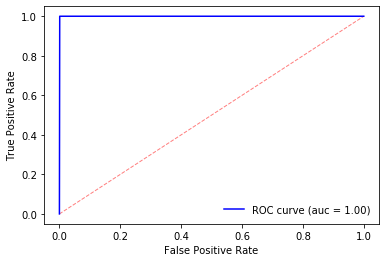

In [19]:
resultado.plot_graphics()